In [1]:
!pip install mlflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.3/28.3 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 643.8/643.8 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 678.3 kB/s eta 0:00:00


In [2]:
!python generate_data_folders.py

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mlflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [10]:
mlops_server_uri = 'https://david-rem-jedha-final-project-mlops.hf.space/'
model_path = 'models:/lung_7_classes/3'
mlflow.set_tracking_uri(mlops_server_uri)
model = mlflow.keras.load_model(model_path)

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 29 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [11]:
valid_datagen = ImageDataGenerator(
        rescale=1/255.
    )

In [13]:
valid_generator = valid_datagen.flow_from_directory(
      'data/Main_dataset_Sample_Multi7_Test',
      target_size=(224, 224),
      class_mode='categorical',
      color_mode="grayscale",
      shuffle=False
    )

Found 14000 images belonging to 7 classes.


In [19]:
predictions = model.predict(valid_generator)
y_pred = np.argmax(predictions, axis=1)
y_true = valid_generator.classes
report = classification_report(y_true, y_pred)


438/438 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step


In [20]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2000
           1       0.96      0.96      0.96      2000
           2       0.97      0.98      0.97      2000
           3       0.98      0.97      0.97      2000
           4       0.99      0.96      0.98      2000
           5       0.99      0.99      0.99      2000
           6       0.94      0.96      0.95      2000

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



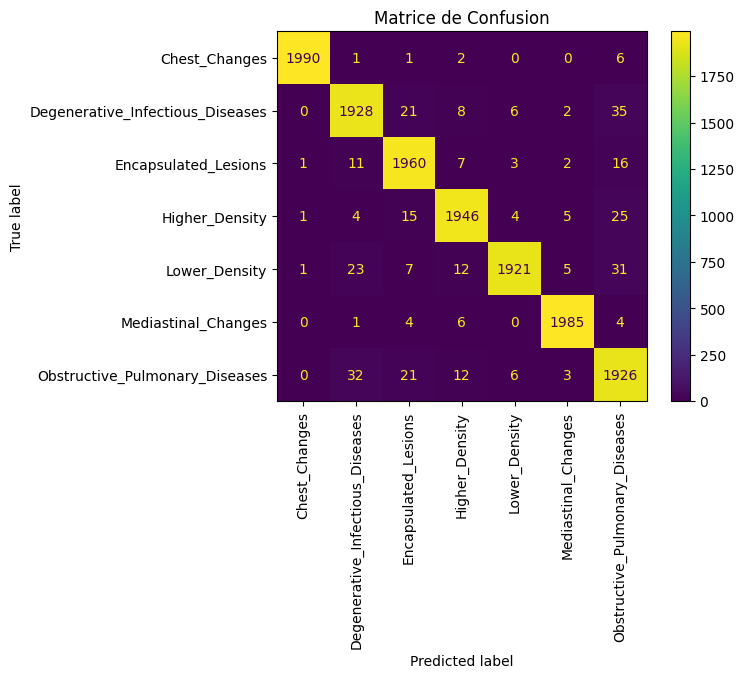

In [18]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=valid_generator.class_indices.keys())
disp.plot()
plt.title("Matrice de Confusion")
plt.xticks(rotation=90)
plt.savefig("confusion_matrix.png")